In [121]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

def Graph_Confusion_Matrix(CM, labels, title = 'Confusion Matrix'):
    #np.fill_diagonal(CM,0)

    plt.figure(figsize = (4,4))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(CM, annot=True,annot_kws={"size": 16},  fmt='.1f' # fmt='g'
               ,xticklabels = labels
               ,yticklabels = labels)# font size
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

plt.style.use('bmh')

## We will first look at the validation results from the balanced data set

In [2]:
df_log   = pd.read_csv("Model Outputs/Logistic_Regression_10F_3P.csv", index_col= "URN")
df_ran_f = pd.read_csv("Model Outputs/Random_forest_Tree_128.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]
df_SVC   = pd.read_csv("Model Outputs/SVC_C10_Gamma0.1.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]
df_lightGBM   = pd.read_csv("Model Outputs/LightGBM.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]

df_log.rename(columns=({"Score": "Logistic"}), inplace= True)
df_ran_f.rename('Random Forest', inplace= True)
df_SVC.rename('SVC', inplace= True)
df_lightGBM.rename("Gradient Boosting", inplace= True)

URN
87358     0.169362
61037     0.299869
32157     0.522497
113322    0.683530
68043     0.360062
2869      0.042270
30515     0.146856
63251     0.976912
36223     0.640947
71145     0.680031
82808     0.043724
36034     0.164560
108474    0.088740
21562     0.117520
58662     0.194330
93498     0.947295
18950     0.910404
44395     0.949652
3932      0.466767
1671      0.453132
125277    0.636778
15568     0.940144
58985     0.595881
105764    0.242064
78305     0.252896
108329    0.631431
108480    0.602402
11427     0.479108
49533     0.138712
128136    0.946704
            ...   
109855    0.388124
26384     0.383915
98780     0.768179
48810     0.072908
60465     0.500162
4982      0.925732
32236     0.963937
69780     0.027274
77840     0.816944
117235    0.213549
18426     0.876403
98190     0.123353
36612     0.956895
36985     0.594688
104092    0.072454
132568    0.234814
128132    0.178283
88330     0.567406
44885     0.709081
118183    0.051985
14456     0.259300
82704   

In [3]:
#Joins all the datasets together
df_model_results = pd.concat([df_log,df_SVC ,df_ran_f,df_lightGBM], axis=1)

In [4]:
df_model_results

,DV,INCOME,Logistic,SVC,Random Forest,Gradient Boosting
URN,,,,,,
87358,0,NaN,0.316865,0.252155,0.165374,0.169362
61037,0,NaN,0.331206,0.353283,0.335168,0.299869
32157,1,50.0,0.694613,0.708099,0.484634,0.522497
113322,1,100.0,0.600821,0.673244,0.662331,0.683530
68043,1,30.0,0.282660,0.260490,0.357426,0.360062
2869,0,NaN,0.056949,0.149722,0.047050,0.042270
30515,0,NaN,0.131057,0.153108,0.202333,0.146856
63251,1,100.0,0.987399,0.912844,0.942334,0.976912
36223,1,50.0,0.916283,0.811499,0.780716,0.640947


Text(0.5, 0.98, 'Confusion Matrices with Boundry:0.5')

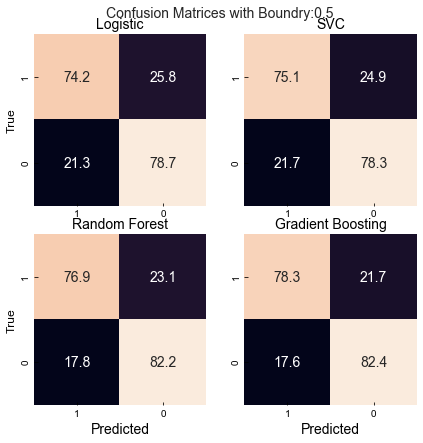

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
fig.tight_layout(rect=[0, 0, 1, 0.95])

Boundry = 0.5

labels = [1,0]

count = 0
for i, col in enumerate(df_model_results.drop(["DV", "INCOME"], axis=1).columns):
        
    CM = confusion_matrix(df_model_results["DV"], df_model_results[col]>=Boundry, labels)
    
    #So we can set the heatmap colour bar to only one columns of cm
    if count == 1: True_Flag= True
    else: True_Flag= False
        
    #Normalise so is a percentage
    CM = np.divide(CM,np.sum(CM, axis=1).reshape(2,-1)) * 100

    sn.set(font_scale=1.4)#for label size
    sn.heatmap(CM, annot=True,annot_kws={"size": 14},  fmt='.1f' # fmt='g'
               ,xticklabels = labels
               ,yticklabels = labels
               ,cbar= False
               ,ax=ax[i//2,count])# font size
    ax[1, count].set_xlabel('Predicted', size=14)
    ax[i//2, 0].set_ylabel('True')
    ax[i//2, count].set_title(col, size=14)
    
    #print(str(i//2), str(count))
    
    count = count + 1
    if count == 2: count = 0
        
fig.suptitle("Confusion Matrices with Boundry:"+str(Boundry), fontsize=14)

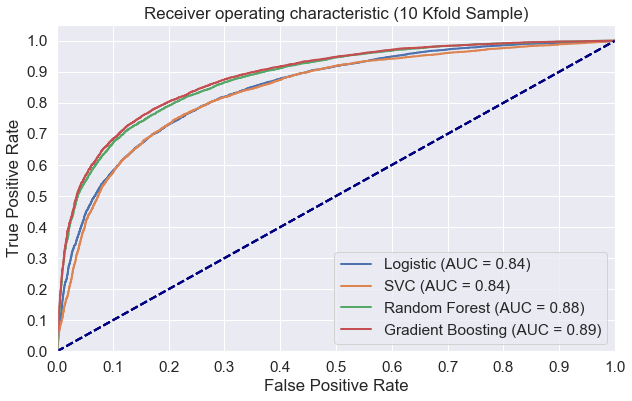

In [6]:
plt.figure(figsize=(10,6))

for i, col in enumerate(df_model_results.drop(["DV", "INCOME"], axis=1).columns):
    
    fpr, tpr, _ = roc_curve(df_model_results["DV"], df_model_results[col])
    roc_auc = auc(fpr, tpr)

    lw = 2
    plt.plot(fpr, tpr, #color='darkorange',
             lw=lw, label= col + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11))
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (10 Kfold Sample)')
    plt.legend(loc="lower right")
    
plt.show()

## Now lets look at how each type of model performs on our validation set with 10/90 split

In [7]:
df_log_UB   = pd.read_csv("Model Outputs/Logistic_Regression_UB_VAL.csv", index_col= "URN")

df_log_UB.drop(["Score Band"], axis=1, inplace=True)

df_ran_f_UB = pd.read_csv("Model Outputs/RF_UB_VAL.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]
df_SVC_UB   = pd.read_csv("Model Outputs/SVC_UB_VAL.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]
df_lightGBM_UB   = pd.read_csv("Model Outputs/LightGBM_UB_VAL.csv", index_col= "URN" ,usecols= ["URN","Score"])["Score"]

df_log_UB.rename(columns=({"Score": "Logistic"}), inplace= True)
df_ran_f_UB.rename('Random Forest', inplace= True)
df_SVC_UB.rename('SVC', inplace= True)
df_lightGBM_UB.rename("Gradient Boosting", inplace= True)

URN
95032     0.202647
75146     0.202647
59253     0.202647
9309      0.059711
121899    0.364339
49387     0.131701
122228    0.986037
28352     0.130097
57015     0.642991
46767     0.240008
128703    0.989547
20952     0.164453
49493     0.195553
109035    0.605427
66099     0.618804
10209     0.969445
66568     0.994112
22150     0.989870
2940      0.993191
77431     0.452006
82743     0.202647
72595     0.481700
10600     0.941859
37146     0.980404
40722     0.151453
77340     0.244450
132310    0.239680
105281    0.077996
443       0.059695
10589     0.974828
            ...   
67436     0.202647
119347    0.986911
84655     0.211774
129982    0.433103
65726     0.279515
123856    0.342196
2748      0.063645
130524    0.978099
122538    0.933997
84479     0.149829
130609    0.149932
85306     0.892030
103356    0.202647
5312      0.940759
64926     0.154206
59736     0.473919
770       0.026441
64821     0.605427
67222     0.996151
41091     0.988319
16024     0.996399
126325  

In [8]:
#Joins all the datasets together
df_model_results_UB = pd.concat([df_log_UB, df_SVC_UB ,df_ran_f_UB,df_lightGBM_UB], axis=1)

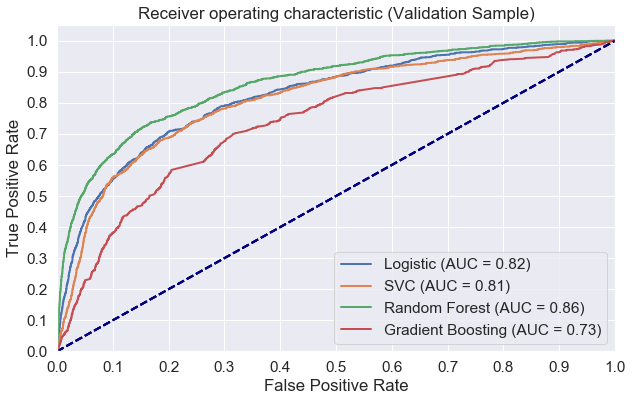

In [9]:
plt.figure(figsize=(10,6))

for i, col in enumerate(df_model_results_UB.drop(["DV", "INCOME"], axis=1).columns):
    
    fpr, tpr, _ = roc_curve(df_model_results_UB["DV"], df_model_results_UB[col])
    roc_auc = auc(fpr, tpr)

    lw = 2
    plt.plot(fpr, tpr, #color='darkorange',
             lw=lw, label= col + ' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11))
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (Validation Sample)')
    plt.legend(loc="lower right")
    
plt.show()

Text(0.5, 0.98, 'Confusion Matrices  with Boundry:0.5')

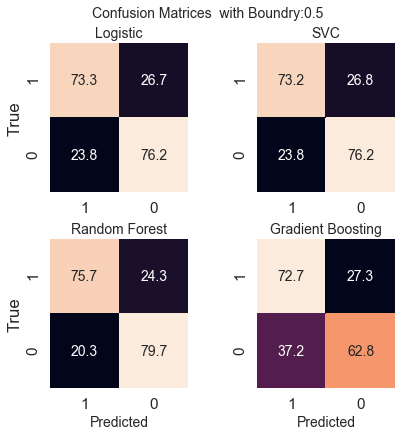

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
fig.tight_layout(rect=[0, 0, 1, 0.95])

Boundry = 0.5

labels = [1,0]

count = 0
for i, col in enumerate(df_model_results_UB.drop(["DV", "INCOME"], axis=1).columns):
        
    CM = confusion_matrix(df_model_results_UB["DV"], df_model_results_UB[col]>=Boundry, labels)
    
    #So we can set the heatmap colour bar to only one columns of cm
    if count == 1: True_Flag= True
    else: True_Flag= False
        
    #Normalise so is a percentage
    CM = np.divide(CM,np.sum(CM, axis=1).reshape(2,-1)) * 100

    sn.set(font_scale=1.4)#for label size
    sn.heatmap(CM, annot=True,annot_kws={"size": 14},  fmt='.1f' # fmt='g'
               ,xticklabels = labels
               ,yticklabels = labels
               ,cbar= False
               ,ax=ax[i//2,count])# font size
    ax[1, count].set_xlabel('Predicted', size=14)
    ax[i//2, 0].set_ylabel('True')
    ax[i//2, count].set_title(col, size=14)
    
    #print(str(i//2), str(count))
    
    count = count + 1
    if count == 2: count = 0
        
fig.suptitle("Confusion Matrices  with Boundry:"+str(Boundry), fontsize=14)

## So we have picked the random forest as it has proven to be the best model

We now want to produce some visuals for this model

In [95]:
df_final = pd.read_csv("Data/Model_Test_Results.csv", index_col="URN")

In [96]:
df_final.head(5)

,DV,INCOME,Score,Score Band
URN,,,,
116161,0,NaN,0.540143,0.5
57204,0,NaN,0.013378,0.0
43939,0,NaN,0.467496,0.4
110525,0,NaN,0.119184,0.1
86514,0,NaN,0.030520,0.0


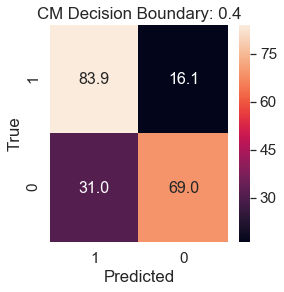

Accuracy: 70.475
Recall: 83.9442436757873
Precision: 22.520775623268698


In [123]:
Boundry = 0.4

CM = confusion_matrix(df_final["DV"], df_final["Score"]>=Boundry, labels)

#Normalise so is a percentage
CM = np.divide(CM,np.sum(CM, axis=1).reshape(2,-1)) * 100

Graph_Confusion_Matrix(CM, labels, 'CM Decision Boundary: '+str(Boundry))

print("Accuracy:", accuracy_score(df_final["DV"], df_final["Score"]>Boundry)*100)
print("Recall:", recall_score(df_final["DV"], df_final["Score"]>Boundry)*100)
print("Precision:", precision_score(df_final["DV"], df_final["Score"]>Boundry)*100)

In [98]:
RF_df_2 = df_final.groupby(["Score Band"])["INCOME"].agg(["count", "sum", "mean","median","std" ,"max"])
RF_df_2 = pd.concat([df_final["Score Band"].value_counts().sort_index(), RF_df_2],axis=1).rename(index=str
                                                                                                                 ,columns={"count":"Donors"
                                                                                                                           ,"Score Band": "Contacted Volume"
                                                                                                                           ,"sum": "Total Value"
                                                                                                                           ,"mean": "Mean Gift"
                                                                                                                           ,"median": "Median Gift"
                                                                                                                           ,"max":"Max Gift"})



In [99]:
RF_df_2["Cost"]= RF_df_2["Contacted Volume"] * 2.50
RF_df_2["Net Profit"] = RF_df_2["Total Value"] - RF_df_2["Cost"]
RF_df_2["RR"] = (RF_df_2["Donors"]/RF_df_2["Contacted Volume"])
RF_df_2

,Contacted Volume,Donors,Total Value,Mean Gift,Median Gift,std,Max Gift,Cost,Net Profit,RR
0.0,3539,23,805.00,35.000000,20.0,40.592207,200.0,8847.5,-8042.50,0.006499
0.1,3047,61,2245.00,36.803279,30.0,30.055959,100.0,7617.5,-5372.50,0.020020
0.2,3256,99,4880.00,49.292929,30.0,101.872795,1000.0,8140.0,-3260.00,0.030405
0.3,2938,128,7115.00,55.585938,30.0,134.529833,1000.0,7345.0,-230.00,0.043567
0.4,2255,167,8631.74,51.687066,30.0,98.972775,1000.0,5637.5,2994.24,0.074058
0.5,1518,152,7617.00,50.111842,30.0,93.953881,1000.0,3795.0,3822.00,0.100132
0.6,1096,153,6974.00,45.581699,30.0,39.295877,250.0,2740.0,4234.00,0.139599
0.7,742,203,9033.00,44.497537,30.0,45.069405,300.0,1855.0,7178.00,0.273585
0.8,667,292,21952.00,75.178082,30.0,316.907925,5000.0,1667.5,20284.50,0.437781
0.9,942,659,32285.47,48.991608,30.0,64.370221,1000.0,2355.0,29930.47,0.699575


In [126]:
RF_df_2["Score Band"] =  RF_df_2.index
RF_df_2["RR"] = RF_df_2["RR"]*100
RF_df_2["ROI"] = RF_df_2["Total Value"] / RF_df_2["Cost"]

RF_df_2["P/L Flag"] =  np.where(RF_df_2["Net Profit"] >= 0, "Profit", "Loss")

In [127]:
RF_df_2

,Contacted Volume,Donors,Total Value,Mean Gift,Median Gift,std,Max Gift,Cost,Net Profit,RR,Score Band,P/L Flag,ROI
0.0,3539,23,805.00,35.000000,20.0,40.592207,200.0,8847.5,-8042.50,6499.011020,0.0,Loss,0.090986
0.1,3047,61,2245.00,36.803279,30.0,30.055959,100.0,7617.5,-5372.50,20019.691500,0.1,Loss,0.294716
0.2,3256,99,4880.00,49.292929,30.0,101.872795,1000.0,8140.0,-3260.00,30405.405405,0.2,Loss,0.599509
0.3,2938,128,7115.00,55.585938,30.0,134.529833,1000.0,7345.0,-230.00,43567.052417,0.3,Loss,0.968686
0.4,2255,167,8631.74,51.687066,30.0,98.972775,1000.0,5637.5,2994.24,74057.649667,0.4,Profit,1.531129
0.5,1518,152,7617.00,50.111842,30.0,93.953881,1000.0,3795.0,3822.00,100131.752306,0.5,Profit,2.007115
0.6,1096,153,6974.00,45.581699,30.0,39.295877,250.0,2740.0,4234.00,139598.540146,0.6,Profit,2.545255
0.7,742,203,9033.00,44.497537,30.0,45.069405,300.0,1855.0,7178.00,273584.905660,0.7,Profit,4.869542
0.8,667,292,21952.00,75.178082,30.0,316.907925,5000.0,1667.5,20284.50,437781.109445,0.8,Profit,13.164618
0.9,942,659,32285.47,48.991608,30.0,64.370221,1000.0,2355.0,29930.47,699575.371550,0.9,Profit,13.709329


In [94]:
#RF_df_2['Net Profit'] = RF_df_2['Net Profit'].map("£{0.0f}".format)

KeyError: '0,'

In [132]:
import plotly.express as px
import plotly.graph_objects as go

gapminder = px.data.gapminder()


size = pd.Series(RF_df_2["Contacted Volume"]).to_list()

fig = px.scatter(RF_df_2, 
                 x="Score Band", 
                 y="Net Profit",
                 #y="ROI"
                )

#Changes the markers as the express sets size to be diameter but we want area
fig.update_traces(marker=dict(
                        color=pd.Series(np.where(RF_df_2["P/L Flag"] == "Loss", "red", "black")).to_list(),
                        size = size,
                        sizemode = "area"
                             ),
                  #title="Net Profit by Propensity Score"
                 )

#Updates the figure to put the title in the middle
fig.update_layout(
    title=go.layout.Title(
        text="Net Profit by Propensity Score",
        xref="paper",
        x=0.5
    )
)

fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter(
    x=RF_df_2["Score Band"], y=RF_df_2["Net Profit"],
    mode='markers',
    marker=dict(
        color=["red", "black"],
        size=RF_df_2["Donors"]/3
    )
)])

fig.show()